# **Лабораторная работа №2**

In [22]:
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

In [24]:
log = xes_importer.apply('BPI_Challenge_2013_incidents.xes.gz')

parsing log, completed traces ::   0%|          | 0/7554 [00:00<?, ?it/s]

In [25]:
log

[{'attributes': {'concept:name': '1-364285768'}, 'events': [{'org:group': 'V30', 'resource country': 'France', 'organization country': 'fr', 'org:resource': 'Frederic', 'organization involved': 'Org line A2', 'org:role': 'A2_4', 'concept:name': 'Accepted', 'impact': 'Medium', 'product': 'PROD582', 'lifecycle:transition': 'In Progress', 'time:timestamp': datetime.datetime(2010, 3, 31, 16, 59, 42, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}, '..', {'org:group': 'V5 3rd', 'resource country': '0', 'organization country': 'fr', 'org:resource': 'Siebel', 'organization involved': 'Org line A2', 'org:role': 'A2_5', 'concept:name': 'Completed', 'impact': 'Medium', 'product': 'PROD582', 'lifecycle:transition': 'Closed', 'time:timestamp': datetime.datetime(2012, 5, 11, 1, 26, 15, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}]}, '....', {'attributes': {'concept:name': '1-740866821'}, 'events': [{'org:group': 'N36', 'resource country': 'USA', 'organization country': 

In [26]:
type(log)

pm4py.objects.log.obj.EventLog

In [27]:
import pm4py

In [21]:
log_xes = pm4py.read_xes('BPI_Challenge_2013_incidents.xes.gz')


parsing log, completed traces ::   0%|          | 0/7554 [00:00<?, ?it/s]

In [28]:
log_result = pm4py.convert_to_dataframe(log_xes)
log_result

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name
0,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 14:59:42+00:00,1-364285768
1,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 15:00:56+00:00,1-364285768
2,V5 3rd,France,fr,Frederic,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-03-31 15:45:48+00:00,1-364285768
3,V5 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 14:44:07+00:00,1-364285768
4,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 14:44:38+00:00,1-364285768
...,...,...,...,...,...,...,...,...,...,...,...,...
65528,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Low,PROD424,In Call,2012-05-05 02:07:43+00:00,1-740866691
65529,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 04:58:40+00:00,1-740866708
65530,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 05:02:39+00:00,1-740866708
65531,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Medium,PROD562,In Call,2012-05-05 05:23:03+00:00,1-740866708


In [84]:
log_result[log_result['org:resource']=='Bernard Lo']

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name,caseend,casestart,relativetime,relativetime_s,relativedays,caselength,Process_time,Process_time_in_sec
29648,T15 2nd,France,fr,Bernard Lo,Org line C,NaN,Completed,Medium,PROD243,Resolved,2012-05-15 15:12:35+00:00,1-735064620,2012-05-15 15:12:35+00:00,2012-04-27 16:30:47+00:00,17 days 22:41:48,1550508,17,17 days 22:41:48,NaT,NaN


In [29]:
type(log_result)

pandas.core.frame.DataFrame

In [30]:
log_result.columns


Index(['org:group', 'resource country', 'organization country', 'org:resource',
       'organization involved', 'org:role', 'concept:name', 'impact',
       'product', 'lifecycle:transition', 'time:timestamp',
       'case:concept:name'],
      dtype='object')

In [31]:
log_result['time:timestamp'] = pd.to_datetime(log_result['time:timestamp'])

log_result

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name
0,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 14:59:42+00:00,1-364285768
1,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 15:00:56+00:00,1-364285768
2,V5 3rd,France,fr,Frederic,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-03-31 15:45:48+00:00,1-364285768
3,V5 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 14:44:07+00:00,1-364285768
4,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 14:44:38+00:00,1-364285768
...,...,...,...,...,...,...,...,...,...,...,...,...
65528,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Low,PROD424,In Call,2012-05-05 02:07:43+00:00,1-740866691
65529,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 04:58:40+00:00,1-740866708
65530,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 05:02:39+00:00,1-740866708
65531,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Medium,PROD562,In Call,2012-05-05 05:23:03+00:00,1-740866708


In [32]:
# Создаем сгруппированную таблицу с начальной отметкой времени и конечной для каждого case
case_starts_ends = log_result.pivot_table(index='case:concept:name', aggfunc={'time:timestamp': ['min', 'max']}) 

case_starts_ends

time:timestamp                          
                                        max                       min
case:concept:name                                                    
1-364285768       2012-05-10 23:26:15+00:00 2010-03-31 14:59:42+00:00
1-467153946       2012-05-22 23:22:25+00:00 2011-01-31 10:12:22+00:00
1-503573772       2012-05-11 23:21:31+00:00 2011-02-24 15:17:46+00:00
1-504538555       2012-05-11 23:21:30+00:00 2011-02-28 13:13:33+00:00
1-506071646       2012-05-11 23:21:30+00:00 2011-03-07 09:42:08+00:00
...                                     ...                       ...
1-740865953       2012-05-07 23:05:33+00:00 2012-05-04 20:48:30+00:00
1-740865969       2012-05-07 23:05:32+00:00 2012-05-04 20:52:14+00:00
1-740866691       2012-05-05 02:07:43+00:00 2012-05-05 02:01:21+00:00
1-740866708       2012-05-05 05:23:03+00:00 2012-05-05 04:58:40+00:00
1-740866821       2012-05-05 12:54:27+00:00 2012-05-05 12:54:27+00:00

[7554 rows x 2 columns]

In [33]:
case_starts_ends = case_starts_ends.reset_index()
case_starts_ends.columns = ['case:concept:name', 'caseend', 'casestart'] 
# Merge with the main event log data so that for each row we have the start and end times.
log_result = log_result.merge(case_starts_ends, on='case:concept:name') 
# Calculate the relative time by subtracting the process start time from the event timestamp
log_result['relativetime'] = log_result['time:timestamp'] - log_result['casestart']
# Convert relative times to more friendly measures
## seconds
log_result['relativetime_s'] = log_result['relativetime'].dt.seconds + 86400*log_result['relativetime'].dt.days 
## days
log_result['relativedays'] = log_result['relativetime'].dt.days

log_result

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name,caseend,casestart,relativetime,relativetime_s,relativedays
0,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 14:59:42+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:00:00,0,0
1,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 15:00:56+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:01:14,74,0
2,V5 3rd,France,fr,Frederic,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-03-31 15:45:48+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:46:06,2766,0
3,V5 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 14:44:07+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,5 days 23:44:25,517465,5
4,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 14:44:38+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,5 days 23:44:56,517496,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65528,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Low,PROD424,In Call,2012-05-05 02:07:43+00:00,1-740866691,2012-05-05 02:07:43+00:00,2012-05-05 02:01:21+00:00,0 days 00:06:22,382,0
65529,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 04:58:40+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:00:00,0,0
65530,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 05:02:39+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:03:59,239,0
65531,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Medium,PROD562,In Call,2012-05-05 05:23:03+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:24:23,1463,0


In [34]:
log_result['caselength'] = log_result['caseend'] - log_result['casestart']

log_result

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name,caseend,casestart,relativetime,relativetime_s,relativedays,caselength
0,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 14:59:42+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:00:00,0,0,771 days 08:26:33
1,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 15:00:56+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:01:14,74,0,771 days 08:26:33
2,V5 3rd,France,fr,Frederic,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-03-31 15:45:48+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:46:06,2766,0,771 days 08:26:33
3,V5 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 14:44:07+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,5 days 23:44:25,517465,5,771 days 08:26:33
4,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 14:44:38+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,5 days 23:44:56,517496,5,771 days 08:26:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65528,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Low,PROD424,In Call,2012-05-05 02:07:43+00:00,1-740866691,2012-05-05 02:07:43+00:00,2012-05-05 02:01:21+00:00,0 days 00:06:22,382,0,0 days 00:06:22
65529,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 04:58:40+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:00:00,0,0,0 days 00:24:23
65530,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 05:02:39+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:03:59,239,0,0 days 00:24:23
65531,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Medium,PROD562,In Call,2012-05-05 05:23:03+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:24:23,1463,0,0 days 00:24:23


In [35]:
import seaborn as sns
## Order by the case length
ordered = log_result.sort_values(by=['caselength', 'case:concept:name', 'relativetime_s'])



In [36]:
ordered.head(10)

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name,caseend,casestart,relativetime,relativetime_s,relativedays,caselength
65532,N36,USA,us,Matt,Org line C,V3_2,Accepted,High,PROD321,In Progress,2012-05-05 12:54:27+00:00,1-740866821,2012-05-05 12:54:27+00:00,2012-05-05 12:54:27+00:00,0 days 00:00:00,0,0,0 days 00:00:00
36315,S37,Sweden,se,Linus,Org line C,V3_2,Accepted,Low,PROD369,In Progress,2012-05-01 15:13:00+00:00,1-737375001,2012-05-01 15:13:04+00:00,2012-05-01 15:13:00+00:00,0 days 00:00:00,0,0,0 days 00:00:04
36316,S37,Sweden,se,Linus,Org line C,V3_2,Accepted,Low,PROD369,In Progress,2012-05-01 15:13:02+00:00,1-737375001,2012-05-01 15:13:04+00:00,2012-05-01 15:13:00+00:00,0 days 00:00:02,2,0,0 days 00:00:04
36317,S37,Sweden,se,Linus,Org line C,V3_2,Completed,Low,PROD369,In Call,2012-05-01 15:13:04+00:00,1-737375001,2012-05-01 15:13:04+00:00,2012-05-01 15:13:00+00:00,0 days 00:00:04,4,0,0 days 00:00:04
55645,D3,Brazil,br,Evandro,Org line B,A2_1,Accepted,Medium,PROD802,In Progress,2012-05-03 13:54:01+00:00,1-739595223,2012-05-03 13:54:11+00:00,2012-05-03 13:54:01+00:00,0 days 00:00:00,0,0,0 days 00:00:10
55646,D3,Brazil,br,Evandro,Org line B,A2_1,Accepted,Medium,PROD802,In Progress,2012-05-03 13:54:07+00:00,1-739595223,2012-05-03 13:54:11+00:00,2012-05-03 13:54:01+00:00,0 days 00:00:06,6,0,0 days 00:00:10
55647,D3,Brazil,br,Evandro,Org line B,A2_1,Completed,Medium,PROD802,In Call,2012-05-03 13:54:11+00:00,1-739595223,2012-05-03 13:54:11+00:00,2012-05-03 13:54:01+00:00,0 days 00:00:10,10,0,0 days 00:00:10
55654,D3,Brazil,br,Evandro,Org line B,A2_1,Accepted,Medium,PROD802,In Progress,2012-05-03 13:54:33+00:00,1-739595297,2012-05-03 13:54:43+00:00,2012-05-03 13:54:33+00:00,0 days 00:00:00,0,0,0 days 00:00:10
55655,D3,Brazil,br,Evandro,Org line B,A2_1,Accepted,Medium,PROD802,In Progress,2012-05-03 13:54:39+00:00,1-739595297,2012-05-03 13:54:43+00:00,2012-05-03 13:54:33+00:00,0 days 00:00:06,6,0,0 days 00:00:10
55656,D3,Brazil,br,Evandro,Org line B,A2_1,Completed,Medium,PROD802,In Call,2012-05-03 13:54:43+00:00,1-739595297,2012-05-03 13:54:43+00:00,2012-05-03 13:54:33+00:00,0 days 00:00:10,10,0,0 days 00:00:10


<Axes: xlabel='relativetime_s', ylabel='case:concept:name'>

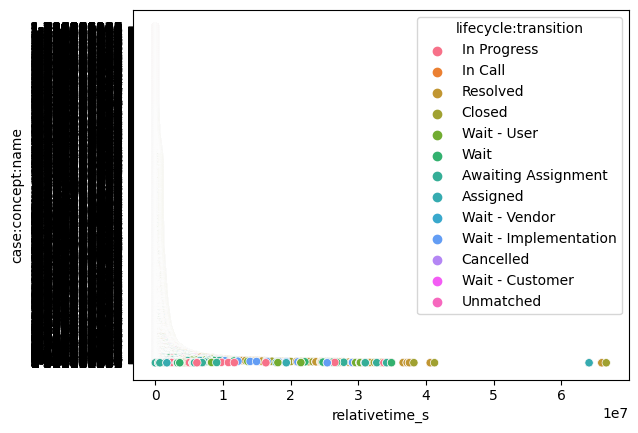

In [37]:
# plt.figure(figsize=(15,15))
sns.scatterplot(x=ordered['relativetime_s'], y=ordered['case:concept:name'], hue=ordered['lifecycle:transition'])

<Axes: xlabel='relativetime_s', ylabel='resource country'>

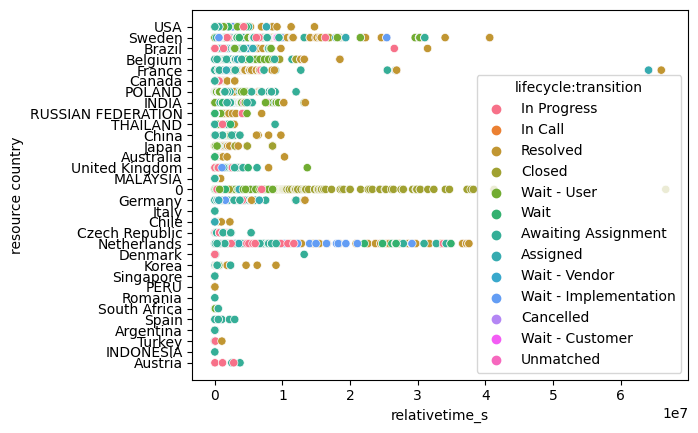

In [38]:
sns.scatterplot(x=ordered['relativetime_s'], y=ordered['resource country'], hue=ordered['lifecycle:transition'])

<Axes: xlabel='relativetime_s', ylabel='lifecycle:transition'>

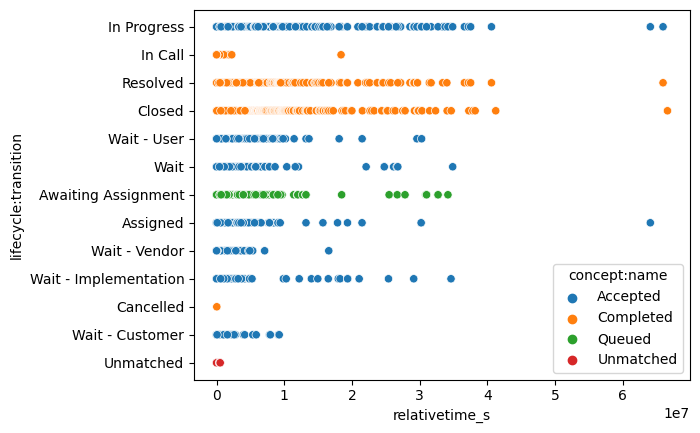

In [39]:
sns.scatterplot(x=ordered['relativetime_s'], y=ordered['lifecycle:transition'], hue=ordered['concept:name'])

In [40]:
product_events = pd.crosstab(log_result['case:concept:name'], log_result['lifecycle:transition']) 
product_events

lifecycle:transition,Assigned,Awaiting Assignment,Cancelled,Closed,In Call,In Progress,Resolved,Unmatched,Wait,Wait - Customer,Wait - Implementation,Wait - User,Wait - Vendor
case:concept:name,,,,,,,,,,,,,
1-364285768,2,4,0,1,0,8,2,0,0,0,0,0,0
1-467153946,4,6,0,1,0,18,1,0,4,0,3,3,0
1-503573772,0,5,0,1,0,9,1,0,1,0,0,0,0
1-504538555,1,5,0,1,0,10,1,0,0,0,1,0,0
1-506071646,1,18,0,1,0,33,1,0,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1-740865953,0,1,0,1,0,3,1,0,1,0,0,0,0
1-740865969,0,1,0,1,0,3,1,0,1,0,0,0,0
1-740866691,0,0,0,0,1,2,0,0,0,0,0,0,0


In [41]:
len(log_result['case:concept:name'].unique())

7554

In [42]:
product_events.sum()

lifecycle:transition
Assigned                  3221
Awaiting Assignment      11544
Cancelled                    1
Closed                    5716
In Call                   2035
In Progress              30239
Resolved                  6115
Unmatched                    5
Wait                      1533
Wait - Customer            101
Wait - Implementation      493
Wait - User               4217
Wait - Vendor              313
dtype: int64

In [43]:
from matplotlib import pyplot as plt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'In Progress'),
  Text(1, 0, 'Awaiting Assignment'),
  Text(2, 0, 'Resolved'),
  Text(3, 0, 'Assigned'),
  Text(4, 0, 'Closed'),
  Text(5, 0, 'Wait - User'),
  Text(6, 0, 'Wait - Implementation'),
  Text(7, 0, 'Wait'),
  Text(8, 0, 'Wait - Vendor'),
  Text(9, 0, 'In Call'),
  Text(10, 0, 'Wait - Customer'),
  Text(11, 0, 'Unmatched'),
  Text(12, 0, 'Cancelled')])

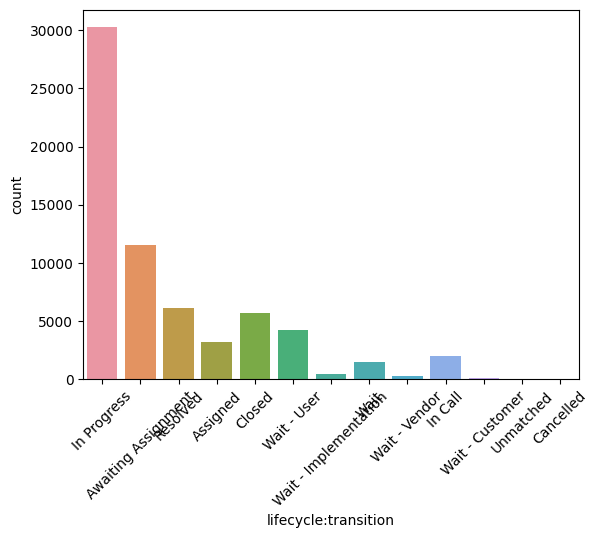

In [44]:
sns.countplot(x=log_result['lifecycle:transition'])
plt.xticks(rotation=45)

In [45]:
product_events.sum(axis=1)

case:concept:name
1-364285768    17
1-467153946    40
1-503573772    17
1-504538555    19
1-506071646    62
               ..
1-740865953     7
1-740865969     7
1-740866691     3
1-740866708     3
1-740866821     1
Length: 7554, dtype: int64

In [46]:
# 2. Переименуем колонки в соответсвии с требованиями Process mining
#log_result.rename(columns=
#                {' DateTime': 'time:timestamp',
#                 'patient': 'case:concept:name',
#                 ' action': 'concept:name',
#                 ' org:resource': 'org:resource'},
#                inplace=True)
#
#log_csv

In [47]:
# 3. Преобразуем DataFrame в формат журнала Process mining
event_log = log_converter.apply(log_result)

# Видим, что теперь тип наших данных EventLog
type(event_log)

pm4py.objects.log.obj.EventLog

In [48]:
event_log

[{'attributes': {'concept:name': '1-364285768'}, 'events': [{'org:group': 'V30', 'resource country': 'France', 'organization country': 'fr', 'org:resource': 'Frederic', 'organization involved': 'Org line A2', 'org:role': 'A2_4', 'concept:name': 'Accepted', 'impact': 'Medium', 'product': 'PROD582', 'lifecycle:transition': 'In Progress', 'time:timestamp': Timestamp('2010-03-31 14:59:42+0000', tz='UTC'), 'caseend': Timestamp('2012-05-10 23:26:15+0000', tz='UTC'), 'casestart': Timestamp('2010-03-31 14:59:42+0000', tz='UTC'), 'relativetime': Timedelta('0 days 00:00:00'), 'relativetime_s': 0, 'relativedays': 0, 'caselength': Timedelta('771 days 08:26:33')}, '..', {'org:group': 'V5 3rd', 'resource country': '0', 'organization country': 'fr', 'org:resource': 'Siebel', 'organization involved': 'Org line A2', 'org:role': 'A2_5', 'concept:name': 'Completed', 'impact': 'Medium', 'product': 'PROD582', 'lifecycle:transition': 'Closed', 'time:timestamp': Timestamp('2012-05-10 23:26:15+0000', tz='UTC'

In [49]:
log_result.shape

(65533, 18)

In [50]:
# Количество различных событий в нашем журнале событий

len(log_result)

65533

In [51]:
# Количество всех кейсов в нашем журнале событий

len(event_log)

7554

In [52]:
len(event_log[1])

40

In [53]:
from pm4py.algo.filtering.log.attributes import attributes_filter

activities = attributes_filter.get_attribute_values(log_result, "org:resource")
activities

{'Frederic': 70,
 'Anne Claire': 7,
 'Eric': 238,
 'Sarah': 176,
 'Loic': 22,
 'Siebel': 6162,
 'Adam': 63,
 'Denny': 28,
 'Paul': 104,
 'Åse': 4,
 'Joseph': 11,
 'Björn T': 4,
 'Suliman': 10,
 'Jon': 82,
 'Gustav': 11,
 'Magnus': 83,
 'Andreas': 542,
 'Torbjörn': 150,
 'Bert': 3,
 'Luc': 122,
 'Henk': 150,
 'Earl': 129,
 'Tsun Fai': 150,
 'Juan': 265,
 'Ilona': 42,
 'Evy': 160,
 'Reinier': 3,
 'Olga': 380,
 'Marcus': 214,
 'Sandra': 195,
 'Daniel': 215,
 'Simon': 258,
 'Marie': 179,
 'Björn': 157,
 'Mats': 88,
 'Per': 366,
 'Katia': 449,
 'Elaine': 9,
 'Rafael': 99,
 'Marcin': 688,
 'Tamara': 13,
 'Marco': 241,
 'Iván': 3,
 'Valeria': 148,
 'Fabrice': 5,
 'Julien': 24,
 'Adeline': 13,
 'Bernard': 26,
 'Jan': 302,
 'Jens': 17,
 'Pawel': 925,
 'Annick': 14,
 'Luiz': 15,
 'Sue': 237,
 'Stina': 16,
 'Charan': 17,
 'Josef': 129,
 'Lucas': 9,
 'Kent': 72,
 'Nina': 291,
 'Edward': 5,
 'Rijin': 29,
 'Ganesh': 31,
 'Dawid': 232,
 'Abdul': 83,
 'Mica': 5,
 'Maria': 252,
 'Kari': 2,
 'Mattias': 

In [54]:
log_result['Process_time'] = log_result.groupby('case:concept:name')['time:timestamp'].diff().shift(-1)

log_result

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name,caseend,casestart,relativetime,relativetime_s,relativedays,caselength,Process_time
0,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 14:59:42+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:00:00,0,0,771 days 08:26:33,0 days 00:01:14
1,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 15:00:56+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:01:14,74,0,771 days 08:26:33,0 days 00:44:52
2,V5 3rd,France,fr,Frederic,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-03-31 15:45:48+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:46:06,2766,0,771 days 08:26:33,5 days 22:58:19
3,V5 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 14:44:07+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,5 days 23:44:25,517465,5,771 days 08:26:33,0 days 00:00:31
4,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 14:44:38+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,5 days 23:44:56,517496,5,771 days 08:26:33,0 days 00:00:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65528,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Low,PROD424,In Call,2012-05-05 02:07:43+00:00,1-740866691,2012-05-05 02:07:43+00:00,2012-05-05 02:01:21+00:00,0 days 00:06:22,382,0,0 days 00:06:22,NaT
65529,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 04:58:40+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:00:00,0,0,0 days 00:24:23,0 days 00:03:59
65530,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 05:02:39+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:03:59,239,0,0 days 00:24:23,0 days 00:20:24
65531,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Medium,PROD562,In Call,2012-05-05 05:23:03+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:24:23,1463,0,0 days 00:24:23,NaT


In [55]:
log_result.groupby(['concept:name']).agg({'Process_time': ['min', 'max', 'mean']})

Process_time                                            
                         min               max                      mean
concept:name                                                            
Accepted     0 days 00:00:01 722 days 06:03:58 1 days 05:08:29.596150489
Completed    0 days 00:00:01  30 days 16:30:03 4 days 17:45:53.629963613
Queued       0 days 00:00:01 284 days 22:30:55 1 days 02:09:35.474099099
Unmatched    0 days 00:00:47   0 days 00:36:48    0 days 00:11:10.400000

In [56]:
log_result["Process_time_in_sec"] = log_result["Process_time"].dt.total_seconds()
log_result

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name,caseend,casestart,relativetime,relativetime_s,relativedays,caselength,Process_time,Process_time_in_sec
0,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 14:59:42+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:00:00,0,0,771 days 08:26:33,0 days 00:01:14,74.0
1,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 15:00:56+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:01:14,74,0,771 days 08:26:33,0 days 00:44:52,2692.0
2,V5 3rd,France,fr,Frederic,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-03-31 15:45:48+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:46:06,2766,0,771 days 08:26:33,5 days 22:58:19,514699.0
3,V5 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 14:44:07+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,5 days 23:44:25,517465,5,771 days 08:26:33,0 days 00:00:31,31.0
4,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 14:44:38+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,5 days 23:44:56,517496,5,771 days 08:26:33,0 days 00:00:09,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65528,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Low,PROD424,In Call,2012-05-05 02:07:43+00:00,1-740866691,2012-05-05 02:07:43+00:00,2012-05-05 02:01:21+00:00,0 days 00:06:22,382,0,0 days 00:06:22,NaT,NaN
65529,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 04:58:40+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:00:00,0,0,0 days 00:24:23,0 days 00:03:59,239.0
65530,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 05:02:39+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:03:59,239,0,0 days 00:24:23,0 days 00:20:24,1224.0
65531,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Medium,PROD562,In Call,2012-05-05 05:23:03+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:24:23,1463,0,0 days 00:24:23,NaT,NaN


In [57]:
import numpy as np

x=pd.pivot_table(log_result,
               index=["org:resource"],
               values=["Process_time_in_sec"],
               aggfunc=np.sum)



In [82]:
x=x.sort_values(by=['Process_time_in_sec'])


In [60]:
from pm4py.algo.filtering.log.attributes import attributes_filter

activities = attributes_filter.get_attribute_values(log_result, 'lifecycle:transition')
activities

{'In Progress': 30239,
 'Awaiting Assignment': 11544,
 'Resolved': 6115,
 'Assigned': 3221,
 'Closed': 5716,
 'Wait - User': 4217,
 'Wait - Implementation': 493,
 'Wait': 1533,
 'Wait - Vendor': 313,
 'In Call': 2035,
 'Wait - Customer': 101,
 'Unmatched': 5,
 'Cancelled': 1}

In [61]:
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.generic.log import case_statistics

variants = variants_filter.get_variants(event_log)
print(f"У нас есть: {len(variants)} различных вариантов путей в нашем журнале событий")

У нас есть: 1511 различных вариантов путей в нашем журнале событий


In [62]:
variants_count = case_statistics.get_variant_statistics(log_result)

variants_count

[{'variant': ('Accepted', 'Accepted', 'Completed'), 'count': 1754},
 {'variant': ('Accepted', 'Accepted', 'Completed', 'Completed'), 'count': 524},
 {'variant': ('Accepted',
   'Accepted',
   'Queued',
   'Accepted',
   'Completed',
   'Completed'),
  'count': 352},
 {'variant': ('Accepted',
   'Accepted',
   'Queued',
   'Accepted',
   'Accepted',
   'Completed',
   'Completed'),
  'count': 334},
 {'variant': ('Queued', 'Accepted', 'Completed', 'Completed'), 'count': 300},
 {'variant': ('Accepted', 'Accepted', 'Accepted', 'Completed', 'Completed'),
  'count': 230},
 {'variant': ('Accepted',
   'Accepted',
   'Queued',
   'Accepted',
   'Accepted',
   'Accepted',
   'Completed',
   'Completed'),
  'count': 185},
 {'variant': ('Accepted',
   'Accepted',
   'Queued',
   'Accepted',
   'Queued',
   'Accepted',
   'Completed',
   'Completed'),
  'count': 161},
 {'variant': ('Accepted',
   'Accepted',
   'Accepted',
   'Accepted',
   'Completed',
   'Completed'),
  'count': 149},
 {'variant

In [63]:
# Импортируем алгоритм из библиотеки PM4PY
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

# Создаем алгоритм
net, initial_marking, final_marking = alpha_miner.apply(event_log)

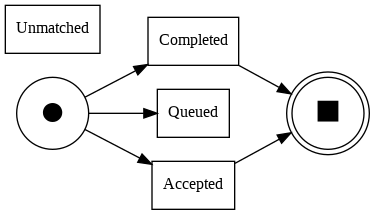

In [64]:
# Импортируем метод визуализации Сетей Петри из библиотеки PM4Py
from pm4py.visualization.petri_net import visualizer as pn_visualizer

gviz = pn_visualizer.apply(net, initial_marking, final_marking)

pn_visualizer.view(gviz)

In [65]:
min(log_result.groupby('case:concept:name').count()['concept:name'])

1

In [66]:
max(log_result.groupby('case:concept:name').count()['concept:name'])

123

In [67]:
log_result['case:concept:name'].value_counts()

1-687082195    123
1-660915327    116
1-627973205     90
1-692067345     76
1-722362086     75
              ... 
1-740812155      2
1-740307161      2
1-740781545      2
1-740462311      2
1-740866821      1
Name: case:concept:name, Length: 7554, dtype: int64

In [68]:
log_result.groupby('concept:name').count()['case:concept:name'] 

concept:name
Accepted     40117
Completed    13867
Queued       11544
Unmatched        5
Name: case:concept:name, dtype: int64

In [69]:
log = log_converter.apply(log_result)

In [70]:
log_result['Process_time'] = log_result.groupby('case:concept:name')['time:timestamp'].diff().shift(-1)

log_result

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name,caseend,casestart,relativetime,relativetime_s,relativedays,caselength,Process_time,Process_time_in_sec
0,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 14:59:42+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:00:00,0,0,771 days 08:26:33,0 days 00:01:14,74.0
1,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 15:00:56+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:01:14,74,0,771 days 08:26:33,0 days 00:44:52,2692.0
2,V5 3rd,France,fr,Frederic,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-03-31 15:45:48+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,0 days 00:46:06,2766,0,771 days 08:26:33,5 days 22:58:19,514699.0
3,V5 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 14:44:07+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,5 days 23:44:25,517465,5,771 days 08:26:33,0 days 00:00:31,31.0
4,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 14:44:38+00:00,1-364285768,2012-05-10 23:26:15+00:00,2010-03-31 14:59:42+00:00,5 days 23:44:56,517496,5,771 days 08:26:33,0 days 00:00:09,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65528,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Low,PROD424,In Call,2012-05-05 02:07:43+00:00,1-740866691,2012-05-05 02:07:43+00:00,2012-05-05 02:01:21+00:00,0 days 00:06:22,382,0,0 days 00:06:22,NaT,NaN
65529,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 04:58:40+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:00:00,0,0,0 days 00:24:23,0 days 00:03:59,239.0
65530,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 05:02:39+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:03:59,239,0,0 days 00:24:23,0 days 00:20:24,1224.0
65531,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Medium,PROD562,In Call,2012-05-05 05:23:03+00:00,1-740866708,2012-05-05 05:23:03+00:00,2012-05-05 04:58:40+00:00,0 days 00:24:23,1463,0,0 days 00:24:23,NaT,NaN


In [71]:
log_result.groupby(['concept:name']).agg({'Process_time': ['min', 'max', 'mean']})

Process_time                                            
                         min               max                      mean
concept:name                                                            
Accepted     0 days 00:00:01 722 days 06:03:58 1 days 05:08:29.596150489
Completed    0 days 00:00:01  30 days 16:30:03 4 days 17:45:53.629963613
Queued       0 days 00:00:01 284 days 22:30:55 1 days 02:09:35.474099099
Unmatched    0 days 00:00:47   0 days 00:36:48    0 days 00:11:10.400000

/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


replaying log with TBR, completed variants ::   0%|          | 0/1511 [00:00<?, ?it/s]

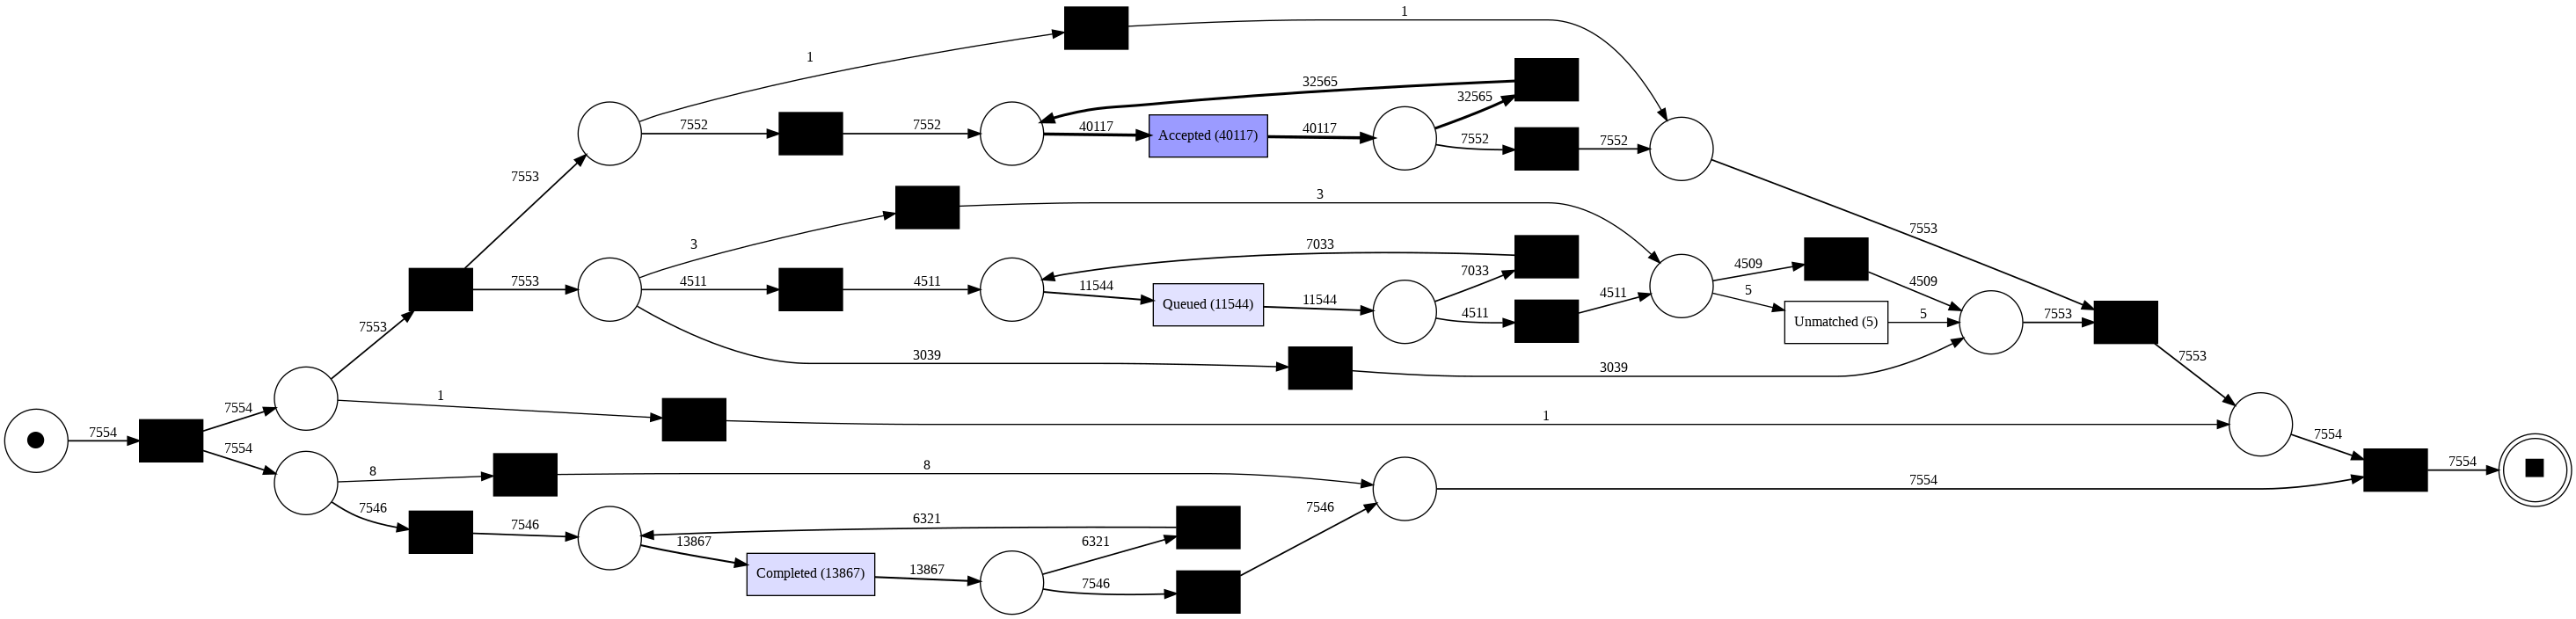

In [72]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
import pm4py
net, im, fm = pm4py.discover_petri_net_inductive(event_log)
from pm4py.visualization.petri_net import visualizer as pn_visualizer
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, im, fm,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=event_log)
pn_visualizer.view(gviz)

In [73]:
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
simp = simplicity_evaluator.apply(net)
print("Простота ", simp)

Простота  0.6666666666666666


In [74]:
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(event_log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print(f"\nТочность {prec}")

replaying log with TBR, completed variants ::   0%|          | 0/11613 [00:00<?, ?it/s]


Точность 0.6258308214735396


In [75]:
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
gen = generalization_evaluator.apply(event_log, net, im, fm)
print(f"\nОбобщение {prec}\n")

replaying log with TBR, completed variants ::   0%|          | 0/1511 [00:00<?, ?it/s]


Обобщение 0.6258308214735396



replaying log with TBR, completed variants ::   0%|          | 0/1511 [00:00<?, ?it/s]

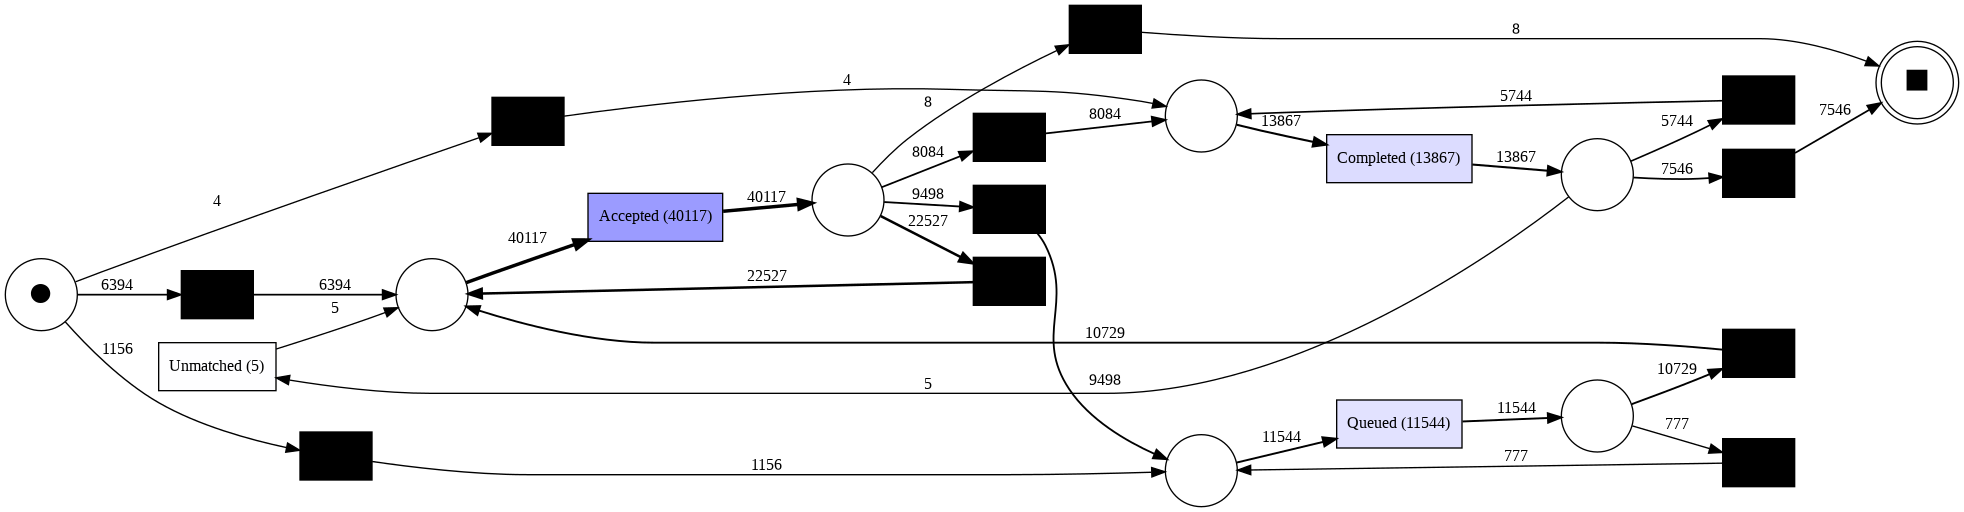

In [76]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

net, im, fm = heuristics_miner.apply(event_log)

from pm4py.visualization.petri_net import visualizer as pn_visualizer
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, im, fm,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=event_log)
pn_visualizer.view(gviz)

In [77]:
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
simp = simplicity_evaluator.apply(net)
print("Простота ", simp)
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(event_log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print(f"\nТочность {prec}")
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
gen = generalization_evaluator.apply(event_log, net, im, fm)
print(f"\nОбобщение {prec}\n")

Простота  0.6216216216216216


replaying log with TBR, completed variants ::   0%|          | 0/11613 [00:00<?, ?it/s]


Точность 0.8850810072924525


replaying log with TBR, completed variants ::   0%|          | 0/1511 [00:00<?, ?it/s]


Обобщение 0.8850810072924525



replaying log with TBR, completed variants ::   0%|          | 0/1511 [00:00<?, ?it/s]

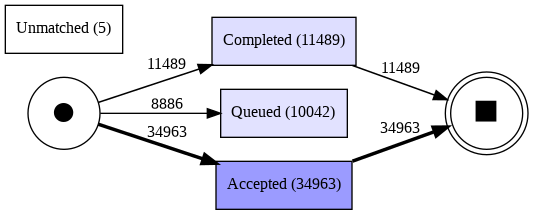

In [78]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

net, im, fm = alpha_miner.apply(event_log)
from pm4py.visualization.petri_net import visualizer as pn_visualizer
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, im, fm,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=event_log)
pn_visualizer.view(gviz)

In [79]:
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
simp = simplicity_evaluator.apply(net)
print("Простота ", simp)
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(event_log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print(f"\nТочность {prec}")
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
gen = generalization_evaluator.apply(event_log, net, im, fm)
print(f"\nОбобщение {prec}\n")

Простота  1.0


replaying log with TBR, completed variants ::   0%|          | 0/11613 [00:00<?, ?it/s]


Точность 0.6000158860441103


replaying log with TBR, completed variants ::   0%|          | 0/1511 [00:00<?, ?it/s]


Обобщение 0.6000158860441103



replaying log with TBR, completed variants ::   0%|          | 0/1511 [00:00<?, ?it/s]

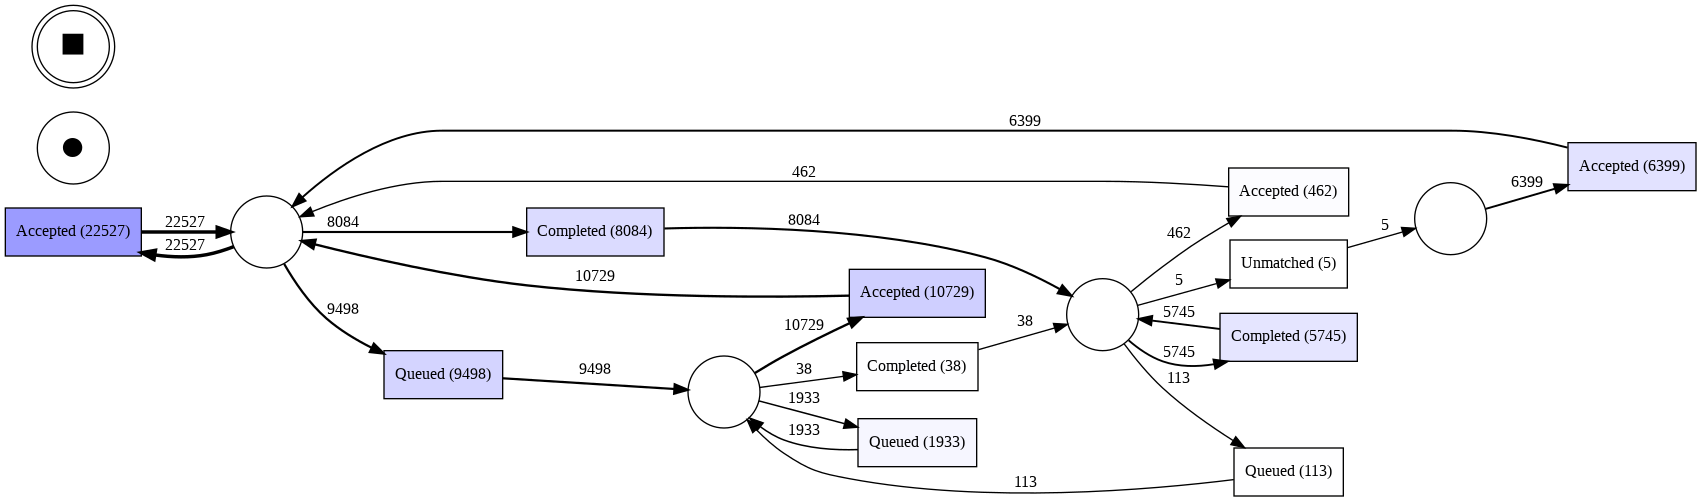

In [80]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg = dfg_discovery.apply(event_log)
from pm4py.objects.conversion.dfg import converter as dfg_mining
net, im, fm = dfg_mining.apply(dfg)
from pm4py.visualization.petri_net import visualizer as pn_visualizer
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, im, fm,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=event_log)
pn_visualizer.view(gviz)

In [81]:
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
simp = simplicity_evaluator.apply(net)
print("Простота ", simp)
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(event_log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print(f"\nТочность {prec}")
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
gen = generalization_evaluator.apply(event_log, net, im, fm)
print(f"\nОбобщение {prec}\n")

Простота  0.6296296296296295


replaying log with TBR, completed variants ::   0%|          | 0/11613 [00:00<?, ?it/s]


Точность 1.0


replaying log with TBR, completed variants ::   0%|          | 0/1511 [00:00<?, ?it/s]


Обобщение 1.0

